In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
clusteringData = pd.read_csv("./features.csv")

missingValues = clusteringData.isnull().sum()
missingValues

file_names = clusteringData["file_name"].copy()

In [10]:
clusteringData.dropna(inplace=True)
clusteringData.drop(['file_name'], axis = 1, inplace= True)
clusteringData.isnull().sum()

spectral_entropy                0
spectral_centroid               0
spectral_flatness               0
spectral_bandwidth              0
std_dev_time_diff               0
mean_time_diff                  0
median_time_diff                0
max_peak                        0
median_peak                     0
std_peak                        0
avg_peaks_per_second            0
sum_peak_magnitude              0
percent_time_above_threshold    0
dtype: int64

In [11]:
# Standardize
scaler = StandardScaler()
scaledData = scaler.fit_transform(clusteringData)


KMeans Clustering Evaluation:
For n_clusters = 2: Inertia = 1619.52, Silhouette Score = 0.285, Calinski-Harabasz = 36.90, Davies-Bouldin = 1.61
For n_clusters = 3: Inertia = 1332.91, Silhouette Score = 0.216, Calinski-Harabasz = 40.78, Davies-Bouldin = 1.59
For n_clusters = 4: Inertia = 1212.54, Silhouette Score = 0.254, Calinski-Harabasz = 35.37, Davies-Bouldin = 1.29
For n_clusters = 5: Inertia = 1045.54, Silhouette Score = 0.235, Calinski-Harabasz = 37.37, Davies-Bouldin = 1.39
For n_clusters = 6: Inertia = 907.95, Silhouette Score = 0.215, Calinski-Harabasz = 39.35, Davies-Bouldin = 1.27
For n_clusters = 7: Inertia = 787.40, Silhouette Score = 0.233, Calinski-Harabasz = 41.87, Davies-Bouldin = 1.19
For n_clusters = 8: Inertia = 778.34, Silhouette Score = 0.208, Calinski-Harabasz = 36.37, Davies-Bouldin = 1.20
For n_clusters = 9: Inertia = 679.93, Silhouette Score = 0.233, Calinski-Harabasz = 39.21, Davies-Bouldin = 1.17
For n_clusters = 10: Inertia = 635.42, Silhouette Score = 0.2

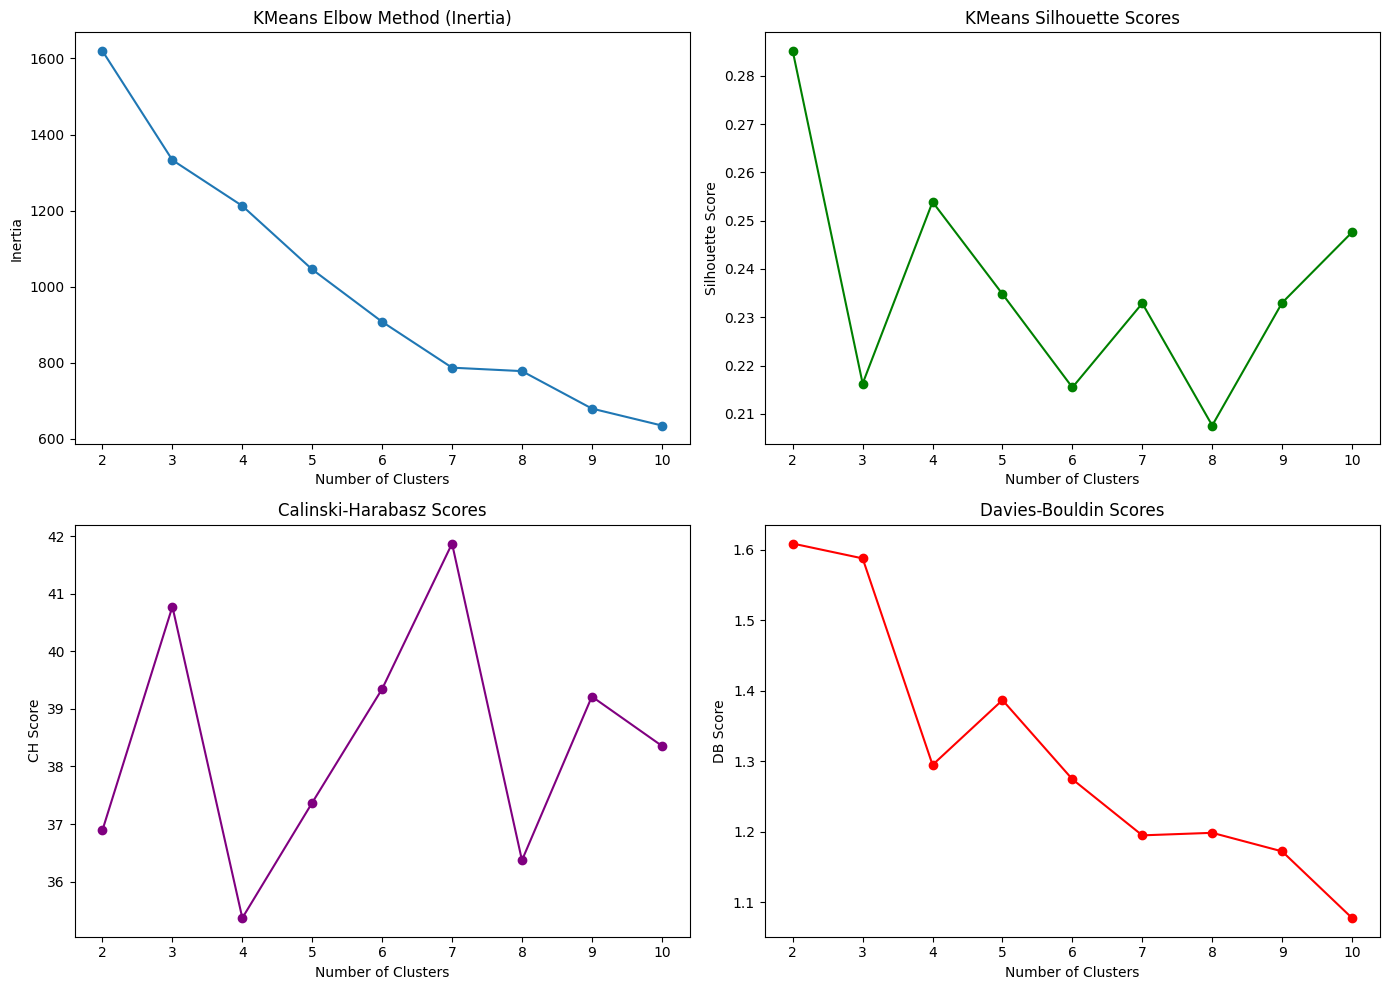

In [12]:
pca = PCA(n_components=6)
pcaData = pca.fit_transform(scaledData)

range_n_clusters = range(2, 11)
inertias = []
silhouette_avgs = []
ch_scores = []
db_scores = []

print("\nKMeans Clustering Evaluation:")
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(pcaData)
    inertia = kmeans.inertia_
    silhouette_avg = silhouette_score(pcaData, labels)
    ch = calinski_harabasz_score(pcaData, labels)
    db = davies_bouldin_score(pcaData, labels)

    inertias.append(inertia)
    silhouette_avgs.append(silhouette_avg)
    ch_scores.append(ch)
    db_scores.append(db)

    print(f"For n_clusters = {n_clusters}: Inertia = {inertia:.2f}, "
          f"Silhouette Score = {silhouette_avg:.3f}, "
          f"Calinski-Harabasz = {ch:.2f}, Davies-Bouldin = {db:.2f}")

# Plotting the evaluation metrics
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(range_n_clusters, inertias, marker='o')
plt.title("KMeans Elbow Method (Inertia)")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

plt.subplot(2, 2, 2)
plt.plot(range_n_clusters, silhouette_avgs, marker='o', color='green')
plt.title("KMeans Silhouette Scores")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")

plt.subplot(2, 2, 3)
plt.plot(range_n_clusters, ch_scores, marker='o', color='purple')
plt.title("Calinski-Harabasz Scores")
plt.xlabel("Number of Clusters")
plt.ylabel("CH Score")

plt.subplot(2, 2, 4)
plt.plot(range_n_clusters, db_scores, marker='o', color='red')
plt.title("Davies-Bouldin Scores")
plt.xlabel("Number of Clusters")
plt.ylabel("DB Score")

plt.tight_layout()
plt.show()

Variance explained by each principal component:
PC1: 24.02%
PC2: 21.29%
PC3: 14.19%
PC4: 10.66%
PC5: 9.47%
PC6: 6.73%


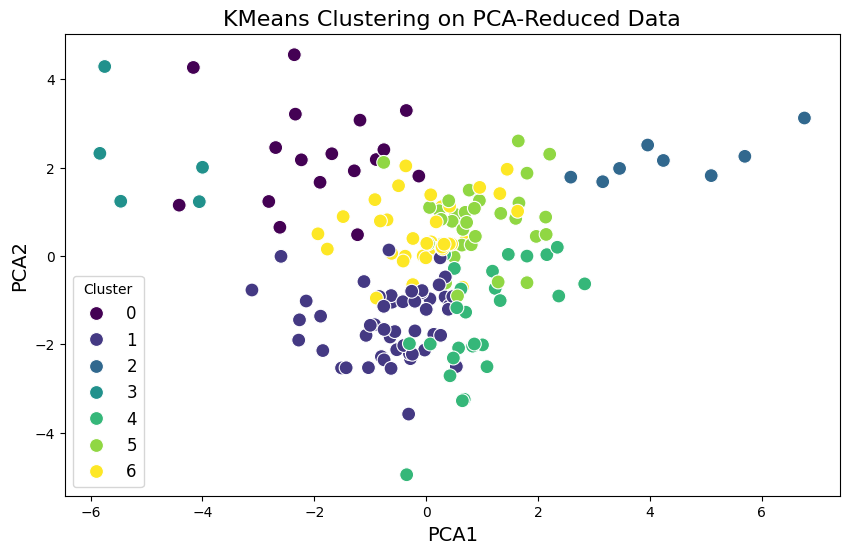

PCA Loadings:
                                   PC1       PC2       PC3       PC4  \
spectral_entropy             -0.032272  0.408428  0.451506  0.050439   
spectral_centroid             0.009532  0.370576  0.455019  0.191465   
spectral_flatness            -0.053906  0.304228  0.197651 -0.058225   
spectral_bandwidth           -0.116026 -0.248810 -0.142215 -0.264900   
std_dev_time_diff            -0.266651  0.288536 -0.009996 -0.068945   
mean_time_diff               -0.390492  0.267907 -0.341918  0.054057   
median_time_diff             -0.382980  0.261804 -0.355721  0.050663   
max_peak                      0.398283  0.296180 -0.210960 -0.280399   
median_peak                   0.207397  0.259917 -0.208060 -0.407313   
std_peak                      0.269610  0.293999 -0.119515 -0.358326   
avg_peaks_per_second         -0.008386  0.270863 -0.369456  0.454647   
sum_peak_magnitude            0.384337  0.028420 -0.204840  0.503787   
percent_time_above_threshold  0.436030  0.044065 -

In [14]:
pca = PCA(n_components=6)
pcaData = pca.fit_transform(scaledData)
pcaDF = pd.DataFrame(data=pcaData, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6'])

variance_ratios = pca.explained_variance_ratio_
print("Variance explained by each principal component:")
for i, ratio in enumerate(variance_ratios, start=1):
    print(f"PC{i}: {ratio:.2%}")

# %%
# Apply KMeans clustering
kmeans = KMeans(n_clusters=7, random_state=42)
clusters = kmeans.fit_predict(pcaData)
pcaDF['Cluster'] = clusters

# %%
# Scatterplot for PCA1 vs PCA2 with cluster labels
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1',
    y='PCA2',
    hue='Cluster',
    data=pcaDF,
    palette='viridis',
    s=100
)
plt.title('KMeans Clustering on PCA-Reduced Data', fontsize=16)
plt.xlabel('PCA1', fontsize=14)
plt.ylabel('PCA2', fontsize=14)
plt.legend(title='Cluster', fontsize=12)
plt.show()

# %%
# Investigating PCA Components: Examine PCA loadings
loading_matrix = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=clusteringData.columns
)

print("PCA Loadings:")
print(loading_matrix)

In [23]:
# Apply PCA
pca = PCA(n_components=6)  # Reduce to 2 components for 2D visualization
pcaData = pca.fit_transform(scaledData)
pcaDF = pd.DataFrame(data=pcaData, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6'])

variance_ratios = pca.explained_variance_ratio_
print("Variance explained by each principal component:")
for i, ratio in enumerate(variance_ratios, start=1):
    print(f"PC{i}: {ratio:.2%}")

Variance explained by each principal component:
PC1: 24.02%
PC2: 21.29%
PC3: 14.19%
PC4: 10.66%
PC5: 9.47%
PC6: 6.73%


In [24]:
# Investigating PCA Components
loading_matrix = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=clusteringData.columns
)

print("PCA Loadings:")
print(loading_matrix)

loading_matrix['PC5']

PCA Loadings:
                                   PC1       PC2       PC3       PC4  \
spectral_entropy             -0.032272  0.408428  0.451506  0.050439   
spectral_centroid             0.009532  0.370576  0.455019  0.191465   
spectral_flatness            -0.053906  0.304228  0.197651 -0.058225   
spectral_bandwidth           -0.116026 -0.248810 -0.142215 -0.264900   
std_dev_time_diff            -0.266651  0.288536 -0.009996 -0.068945   
mean_time_diff               -0.390492  0.267907 -0.341918  0.054057   
median_time_diff             -0.382980  0.261804 -0.355721  0.050663   
max_peak                      0.398283  0.296180 -0.210960 -0.280399   
median_peak                   0.207397  0.259917 -0.208060 -0.407313   
std_peak                      0.269610  0.293999 -0.119515 -0.358326   
avg_peaks_per_second         -0.008386  0.270863 -0.369456  0.454647   
sum_peak_magnitude            0.384337  0.028420 -0.204840  0.503787   
percent_time_above_threshold  0.436030  0.044065 -

spectral_entropy                0.157403
spectral_centroid              -0.199962
spectral_flatness               0.658361
spectral_bandwidth              0.633707
std_dev_time_diff              -0.010170
mean_time_diff                 -0.041384
median_time_diff               -0.050997
max_peak                        0.053003
median_peak                    -0.194356
std_peak                       -0.042450
avg_peaks_per_second            0.120316
sum_peak_magnitude              0.169343
percent_time_above_threshold    0.101292
Name: PC5, dtype: float64

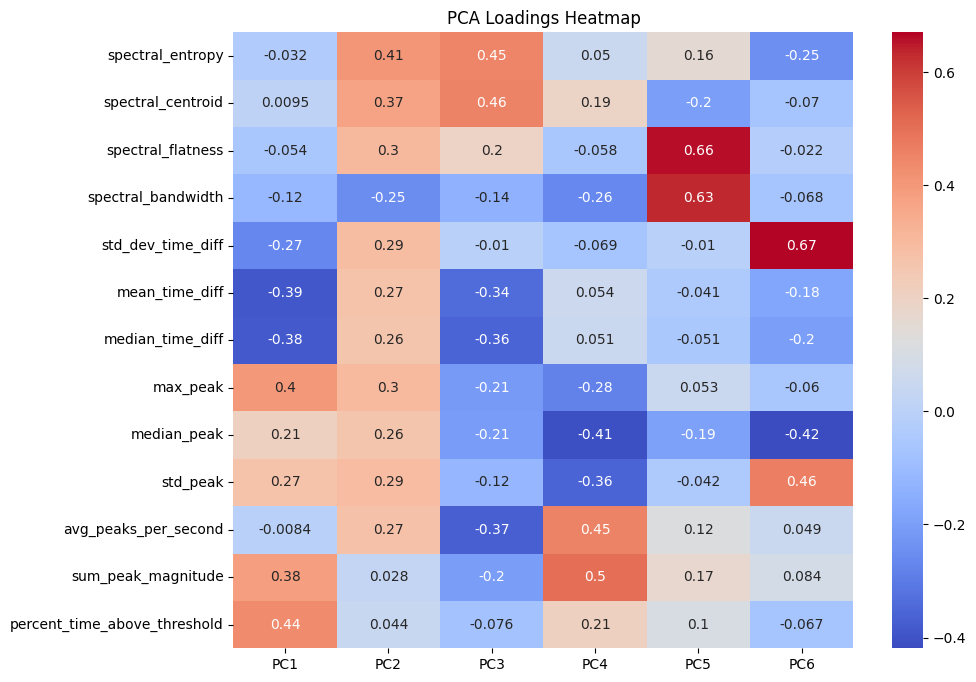

In [25]:
# Visualizing PCA Components
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(loading_matrix, annot=True, cmap='coolwarm')
plt.title("PCA Loadings Heatmap")
plt.show()


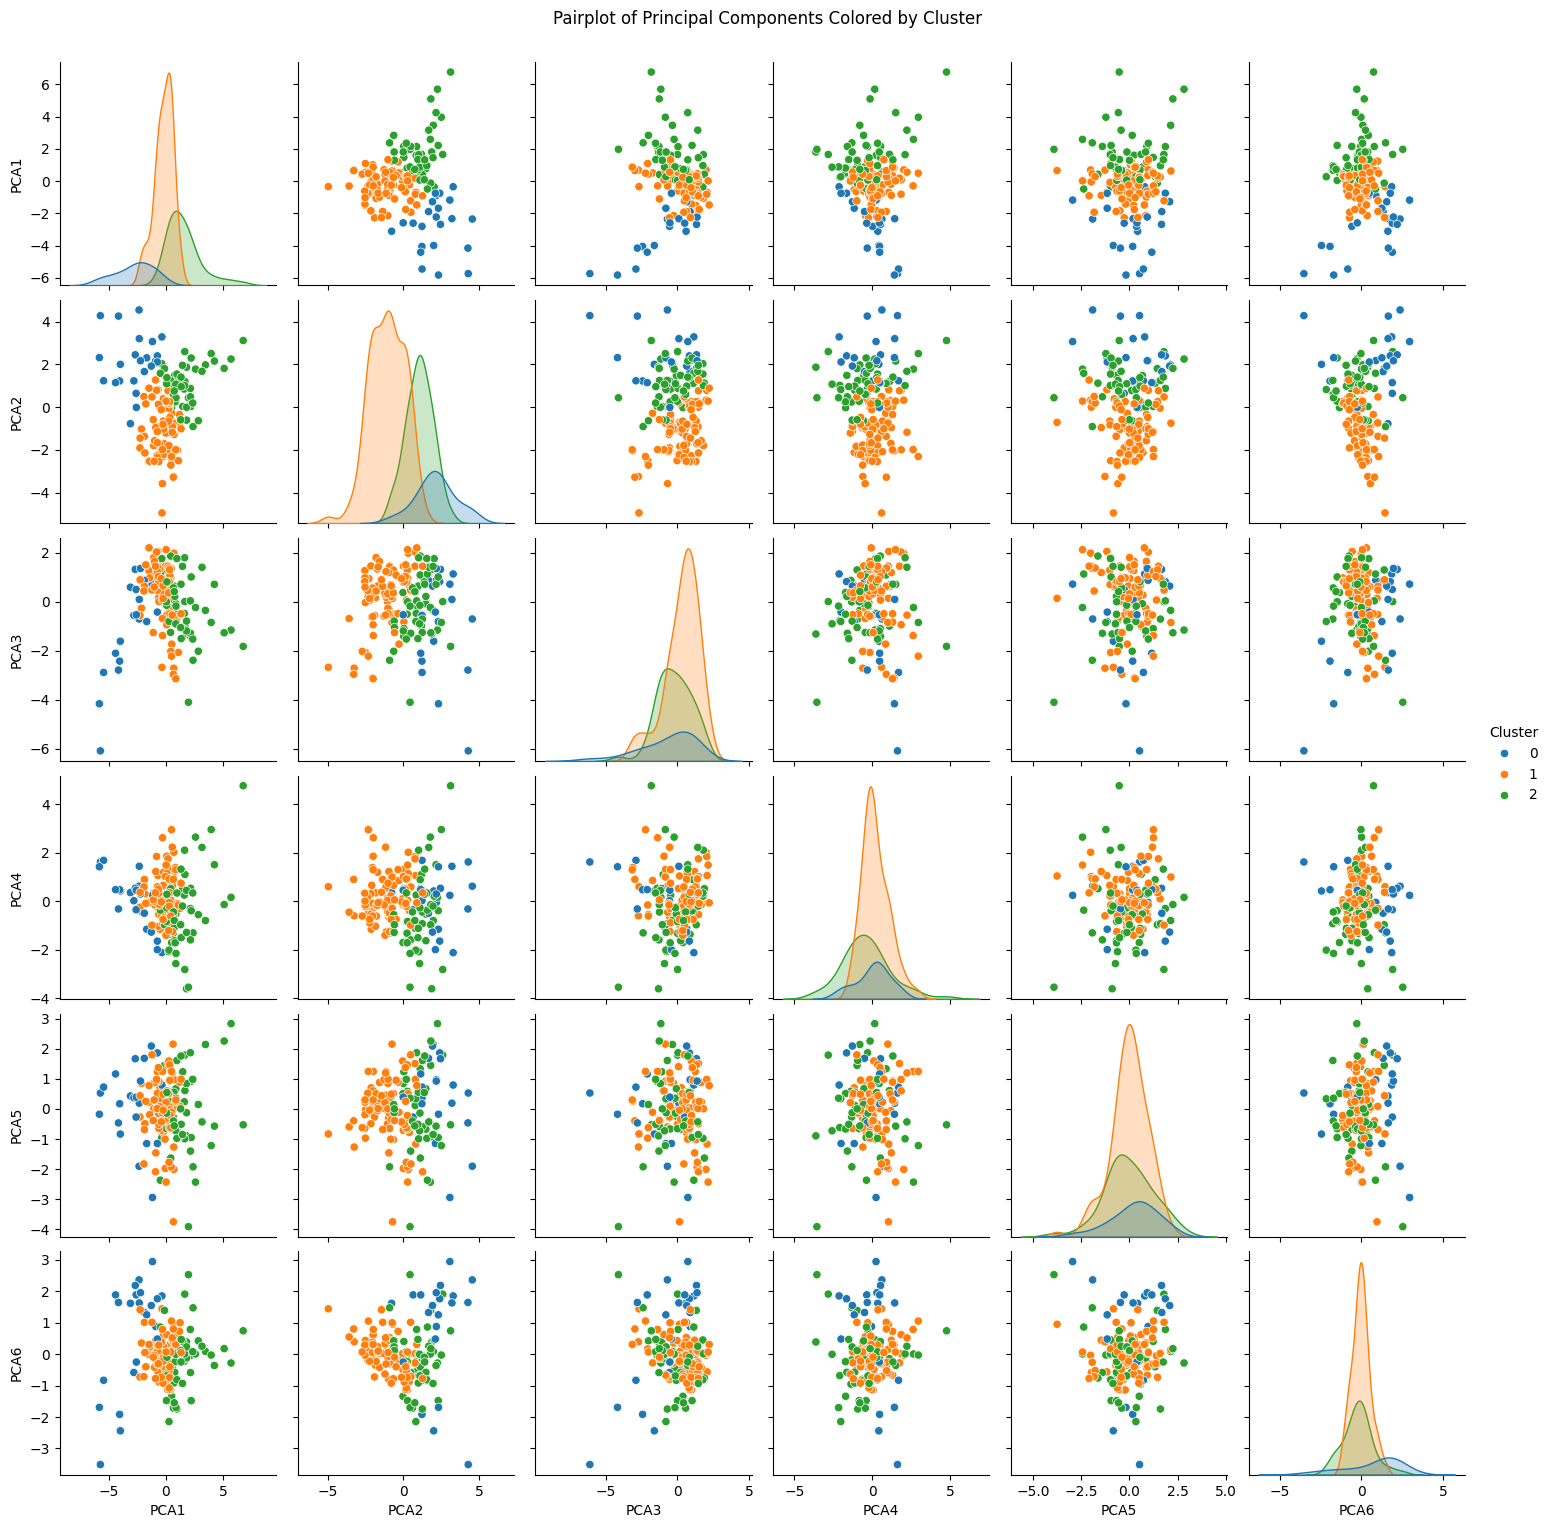

In [26]:
k = 6  # Adjust based on your dataset
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(pcaDF)

# Add cluster labels to the DataFrame
pcaDF['Cluster'] = labels

# Create a pairplot of the first few PCA components, colored by cluster
sns.pairplot(pcaDF, hue='Cluster', palette="tab10", diag_kind='kde')

# Add title
plt.suptitle("Pairplot of Principal Components Colored by Cluster", y=1.02)
plt.show()

In [30]:
# save to csv file
pcaDF["file_name"] = file_names
pcaDF.to_csv("pcaDF.csv", index=False)

In [31]:
pcaDF['file_name']

0      Data/After_May/MATLAB 4-20 PM Wed, Jun 19, 202...
1      Data/After_May/MATLAB 3-15 PM Thu, Oct 24, 202...
2      Data/After_May/MATLAB 5-01 PM Tue, Oct 1, 2024...
3      Data/After_May/MATLAB 12-54 PM Thu, Nov 7, 202...
4      Data/After_May/MATLAB 4-29 PM Wed, Nov 6, 2024...
                             ...                        
170    Data/After_May/MATLAB 1-45 PM Tue, Oct 22, 202...
171    Data/After_May/MATLAB 4-36 PM Thu, Oct 17, 202...
172    Data/After_May/MATLAB 2-39 PM Mon, Oct 28, 202...
173    Data/After_May/MATLAB 3-05 PM Fri, Sep 13, 202...
174    Data/After_May/MATLAB 4-24 PM Thu, Oct 10, 202...
Name: file_name, Length: 175, dtype: object

2 pca components

Variance explained by each principal component:
PC1: 24.02%
PC2: 21.29%


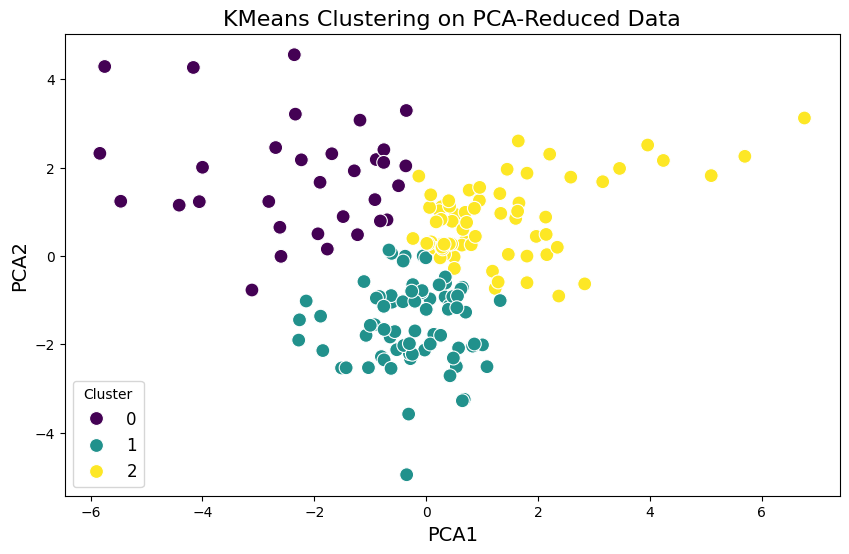

PCA Loadings:
                                   PC1       PC2
spectral_entropy             -0.032272  0.408428
spectral_centroid             0.009532  0.370576
spectral_flatness            -0.053906  0.304228
spectral_bandwidth           -0.116026 -0.248810
std_dev_time_diff            -0.266651  0.288536
mean_time_diff               -0.390492  0.267907
median_time_diff             -0.382980  0.261804
max_peak                      0.398283  0.296180
median_peak                   0.207397  0.259917
std_peak                      0.269610  0.293999
avg_peaks_per_second         -0.008386  0.270863
sum_peak_magnitude            0.384337  0.028420
percent_time_above_threshold  0.436030  0.044065


In [34]:
pca = PCA(n_components=2)
pcaData = pca.fit_transform(scaledData)
pcaDF = pd.DataFrame(data=pcaData, columns=['PCA1', 'PCA2'])

variance_ratios = pca.explained_variance_ratio_
print("Variance explained by each principal component:")
for i, ratio in enumerate(variance_ratios, start=1):
    print(f"PC{i}: {ratio:.2%}")

# %%
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pcaData)
pcaDF['Cluster'] = clusters

# %%
# Scatterplot for PCA1 vs PCA2 with cluster labels
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1',
    y='PCA2',
    hue='Cluster',
    data=pcaDF,
    palette='viridis',
    s=100
)
plt.title('KMeans Clustering on PCA-Reduced Data', fontsize=16)
plt.xlabel('PCA1', fontsize=14)
plt.ylabel('PCA2', fontsize=14)
plt.legend(title='Cluster', fontsize=12)
plt.show()

# %%
# Investigating PCA Components: Examine PCA loadings
loading_matrix = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=clusteringData.columns
)

print("PCA Loadings:")
print(loading_matrix)

pcaDF["file_name"] = file_names
pcaDF.to_csv("pcaDF_2.csv", index=False)

3 pca

Variance explained by each principal component:
PC1: 24.02%
PC2: 21.29%
PC3: 14.19%


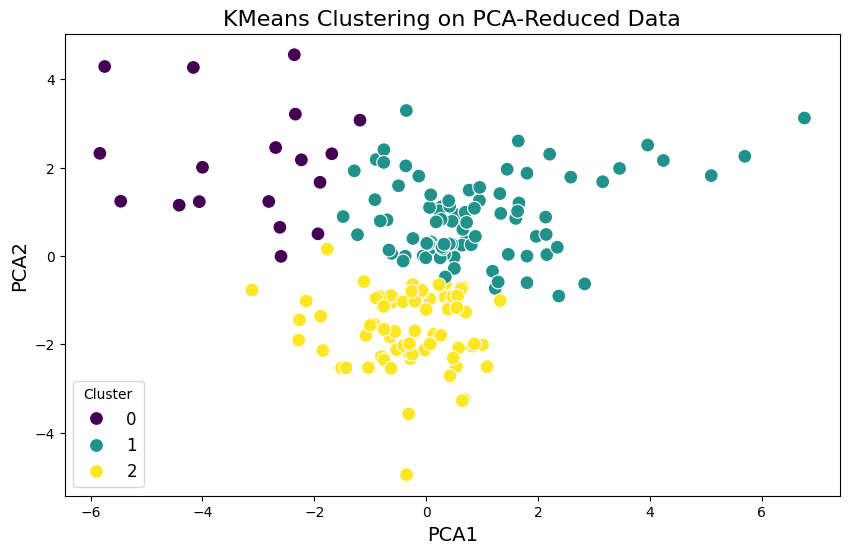

PCA Loadings:
                                   PC1       PC2       PC3
spectral_entropy             -0.032272  0.408428  0.451506
spectral_centroid             0.009532  0.370576  0.455019
spectral_flatness            -0.053906  0.304228  0.197651
spectral_bandwidth           -0.116026 -0.248810 -0.142215
std_dev_time_diff            -0.266651  0.288536 -0.009996
mean_time_diff               -0.390492  0.267907 -0.341918
median_time_diff             -0.382980  0.261804 -0.355721
max_peak                      0.398283  0.296180 -0.210960
median_peak                   0.207397  0.259917 -0.208060
std_peak                      0.269610  0.293999 -0.119515
avg_peaks_per_second         -0.008386  0.270863 -0.369456
sum_peak_magnitude            0.384337  0.028420 -0.204840
percent_time_above_threshold  0.436030  0.044065 -0.075691


In [35]:
pca = PCA(n_components=3)
pcaData = pca.fit_transform(scaledData)
pcaDF = pd.DataFrame(data=pcaData, columns=['PCA1', 'PCA2', 'PCA3'])

variance_ratios = pca.explained_variance_ratio_
print("Variance explained by each principal component:")
for i, ratio in enumerate(variance_ratios, start=1):
    print(f"PC{i}: {ratio:.2%}")

# %%
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pcaData)
pcaDF['Cluster'] = clusters

# %%
# Scatterplot for PCA1 vs PCA2 with cluster labels
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1',
    y='PCA2',
    hue='Cluster',
    data=pcaDF,
    palette='viridis',
    s=100
)
plt.title('KMeans Clustering on PCA-Reduced Data', fontsize=16)
plt.xlabel('PCA1', fontsize=14)
plt.ylabel('PCA2', fontsize=14)
plt.legend(title='Cluster', fontsize=12)
plt.show()

# %%
# Investigating PCA Components: Examine PCA loadings
loading_matrix = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=clusteringData.columns
)

print("PCA Loadings:")
print(loading_matrix)

pcaDF["file_name"] = file_names
pcaDF.to_csv("pcaDF_3.csv", index=False)

Variance explained by each principal component:
PC1: 24.02%
PC2: 21.29%
PC3: 14.19%
PC4: 10.66%


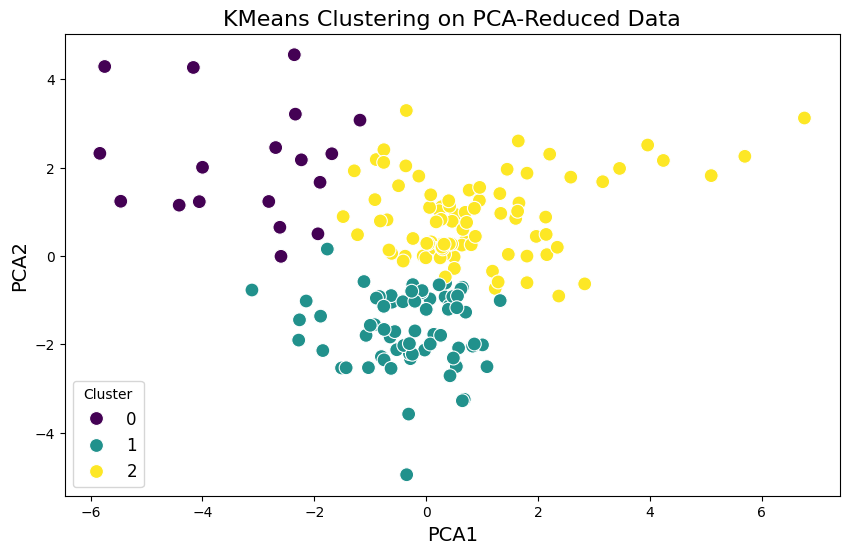

PCA Loadings:
                                   PC1       PC2       PC3       PC4
spectral_entropy             -0.032272  0.408428  0.451506  0.050439
spectral_centroid             0.009532  0.370576  0.455019  0.191465
spectral_flatness            -0.053906  0.304228  0.197651 -0.058225
spectral_bandwidth           -0.116026 -0.248810 -0.142215 -0.264900
std_dev_time_diff            -0.266651  0.288536 -0.009996 -0.068945
mean_time_diff               -0.390492  0.267907 -0.341918  0.054057
median_time_diff             -0.382980  0.261804 -0.355721  0.050663
max_peak                      0.398283  0.296180 -0.210960 -0.280399
median_peak                   0.207397  0.259917 -0.208060 -0.407313
std_peak                      0.269610  0.293999 -0.119515 -0.358326
avg_peaks_per_second         -0.008386  0.270863 -0.369456  0.454647
sum_peak_magnitude            0.384337  0.028420 -0.204840  0.503787
percent_time_above_threshold  0.436030  0.044065 -0.075691  0.208716


In [36]:
pca = PCA(n_components=4)
pcaData = pca.fit_transform(scaledData)
pcaDF = pd.DataFrame(data=pcaData, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4'])

variance_ratios = pca.explained_variance_ratio_
print("Variance explained by each principal component:")
for i, ratio in enumerate(variance_ratios, start=1):
    print(f"PC{i}: {ratio:.2%}")

# %%
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pcaData)
pcaDF['Cluster'] = clusters

# %%
# Scatterplot for PCA1 vs PCA2 with cluster labels
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1',
    y='PCA2',
    hue='Cluster',
    data=pcaDF,
    palette='viridis',
    s=100
)
plt.title('KMeans Clustering on PCA-Reduced Data', fontsize=16)
plt.xlabel('PCA1', fontsize=14)
plt.ylabel('PCA2', fontsize=14)
plt.legend(title='Cluster', fontsize=12)
plt.show()

# %%
# Investigating PCA Components: Examine PCA loadings
loading_matrix = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=clusteringData.columns
)

print("PCA Loadings:")
print(loading_matrix)

pcaDF["file_name"] = file_names
pcaDF.to_csv("pcaDF_4.csv", index=False)

5 pca

Variance explained by each principal component:
PC1: 24.02%
PC2: 21.29%
PC3: 14.19%
PC4: 10.66%
PC5: 9.47%


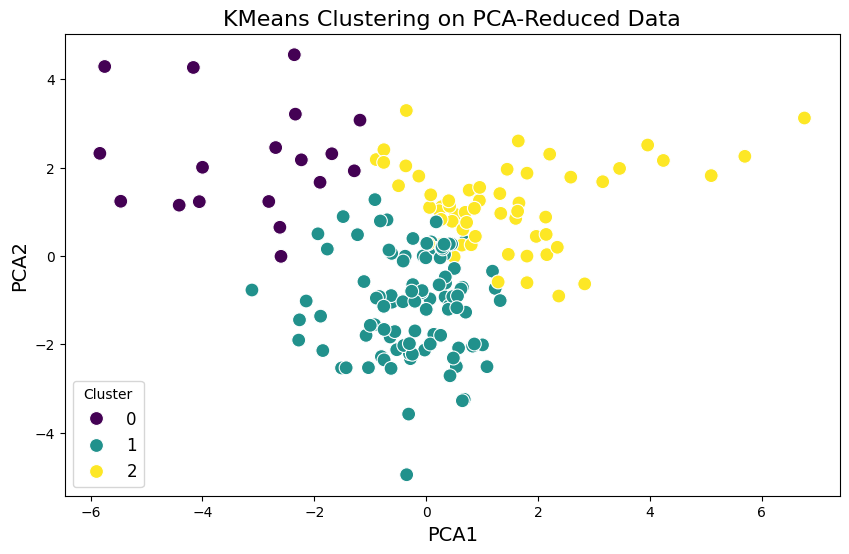

PCA Loadings:
                                   PC1       PC2       PC3       PC4       PC5
spectral_entropy             -0.032272  0.408428  0.451506  0.050439  0.157403
spectral_centroid             0.009532  0.370576  0.455019  0.191465 -0.199962
spectral_flatness            -0.053906  0.304228  0.197651 -0.058225  0.658361
spectral_bandwidth           -0.116026 -0.248810 -0.142215 -0.264900  0.633707
std_dev_time_diff            -0.266651  0.288536 -0.009996 -0.068945 -0.010170
mean_time_diff               -0.390492  0.267907 -0.341918  0.054057 -0.041384
median_time_diff             -0.382980  0.261804 -0.355721  0.050663 -0.050997
max_peak                      0.398283  0.296180 -0.210960 -0.280399  0.053003
median_peak                   0.207397  0.259917 -0.208060 -0.407313 -0.194356
std_peak                      0.269610  0.293999 -0.119515 -0.358326 -0.042450
avg_peaks_per_second         -0.008386  0.270863 -0.369456  0.454647  0.120316
sum_peak_magnitude            0.384337

In [37]:
pca = PCA(n_components=5)
pcaData = pca.fit_transform(scaledData)
pcaDF = pd.DataFrame(data=pcaData, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5'])

variance_ratios = pca.explained_variance_ratio_
print("Variance explained by each principal component:")
for i, ratio in enumerate(variance_ratios, start=1):
    print(f"PC{i}: {ratio:.2%}")

# %%
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pcaData)
pcaDF['Cluster'] = clusters

# %%
# Scatterplot for PCA1 vs PCA2 with cluster labels
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1',
    y='PCA2',
    hue='Cluster',
    data=pcaDF,
    palette='viridis',
    s=100
)
plt.title('KMeans Clustering on PCA-Reduced Data', fontsize=16)
plt.xlabel('PCA1', fontsize=14)
plt.ylabel('PCA2', fontsize=14)
plt.legend(title='Cluster', fontsize=12)
plt.show()

# %%
# Investigating PCA Components: Examine PCA loadings
loading_matrix = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=clusteringData.columns
)

print("PCA Loadings:")
print(loading_matrix)

pcaDF["file_name"] = file_names
pcaDF.to_csv("pcaDF_5.csv", index=False)